In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import ttest_ind, norm
from statsmodels.stats.weightstats import ztest

In [2]:
def zscore(g1, g2, std):
    sigma = std * np.sqrt(2. / len(g1))
    
    z = (g1.mean() - g2.mean()) / sigma
    
    return z

def tscore(g1, g2):
    pooled_sigma = np.sqrt((g1.var(0) + g2.var(0))/(len(g1) + len(g2) - 2))
    
    t = (g1.mean() - g2.mean()) / (pooled_sigma * np.sqrt(2. / len(g1)))
    
    return t

In [42]:
size = 10
std = 2

while True:
    g1 = np.random.normal(loc=8, scale=std, size=size)
    g2 = np.random.normal(loc=9, scale=std, size=size)
    pval = ttest_ind(g1, g2)[1]
    if .04 < pval < .15:
        break

pooled = np.concatenate([g1, g2])

In [44]:
ttest_ind(g1, g2)

Ttest_indResult(statistic=-1.7941715332877741, pvalue=0.0896006938261855)

In [45]:
ztest(g1, g2)

(-1.794171533287774, 0.07278579427210491)

In [46]:
z = zscore(g1, g2, std)
print(z)

norm.cdf(z)*2

-1.8289220414796579


0.06741128775848405

In [53]:
diffs = []
zs = []
ts = []
z = zscore(g1, g2, std)

total = 0
larger_z = 0

for s in range(100000):
    sample_g1 = np.random.choice(pooled, replace=True, size=size)
    sample_g2 = np.random.choice(pooled, replace=True, size=size)
    
    sample_z = zscore(sample_g1, sample_g2, std)
    sample_t = tscore(sample_g1, sample_g2)
    zs.append(sample_z)
    ts.append(sample_t)
    if abs(sample_z) > abs(z):
        larger_z += 1
    total += 1
    
percent_larger = float(larger_z)/total
percent_larger

0.08242

### Instead of bootstrapping, resample with known STD

This results in a closer match to our calculated z score

In [54]:
zs = []
z = zscore(g1, g2, std)

total = 0
larger_z = 0

for s in range(100000):
    sample_g1 = np.random.normal(loc=0, scale=std, size=size)
    sample_g2 = np.random.normal(loc=0, scale=std, size=size)
    
    sample_z = zscore(sample_g1, sample_g2, std)
    zs.append(sample_z)
    if abs(sample_z) > abs(z):
        larger_z += 1
    total += 1
    
percent_larger = float(larger_z)/total
percent_larger

0.06709

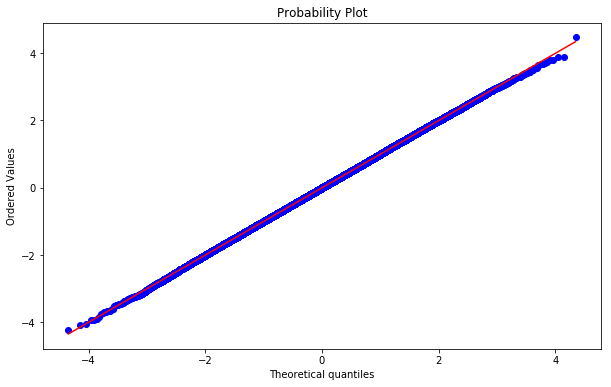

In [55]:
import scipy.stats as stats

_ = stats.probplot(zs, dist="norm", plot=plt.subplots(figsize=(10, 6))[1])

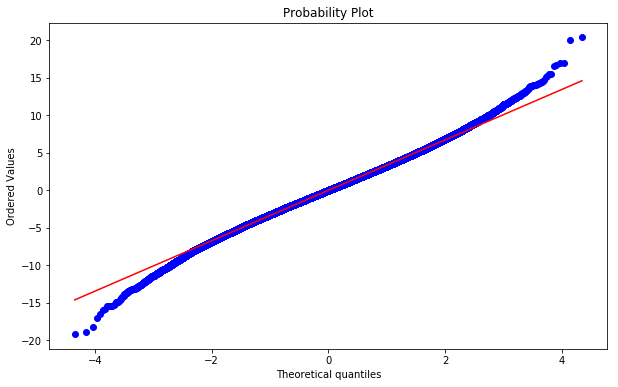

In [56]:
"""
As we can see, T values do not follow the standard normal distribution. 
In particular, this mis-estimates the tails of the distribution
"""

_ = stats.probplot(ts, dist="norm", plot=plt.subplots(figsize=(10, 6))[1])

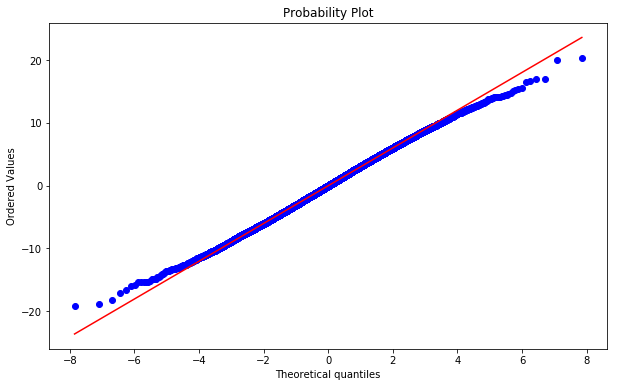

In [57]:
_ = stats.probplot(ts, dist='t', sparams=size, plot=plt.subplots(figsize=(10, 6))[1])

### Sample Size and Mean Convergence

In [58]:
sample_sizes = [1, 5, 10, 20, 50, 100, 300]
size = 15
std = 10

dat = {sample_size: [np.random.normal(loc=75, scale=std, size=sample_size).mean()
          for _ in range(1000)]
       for sample_size in sample_sizes}

(70, 80)

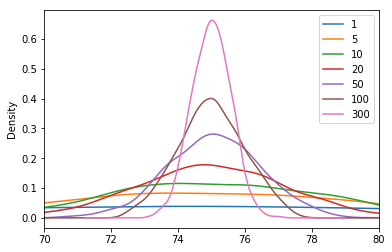

In [59]:
for s in sample_sizes:
    pd.Series(dat[s]).plot(kind='kde', label=s, legend=True)
    
plt.gca().set_xlim(70, 80)